# **Model Testing and Submission Notebook**

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from math import sqrt
import statsmodels.api as sm # Use model.summary() for info on all our X-variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Reading Data into Notebook

In [2]:
train = pd.read_csv('./train_cleaned.csv') # My cleaned training data from my cleaning notebook
test = pd.read_csv('./test_cleaned.csv') # reading in my cleaned test data

In [3]:
pd.set_option('max_columns', 210) # Setting these so I can make sure I see all my data
pd.set_option('max_rows', 210)

In [4]:
test.shape # checking shape to make sure it is 1 less than my train data

(1459, 62)

In [5]:
train.shape # checking shape to make sure it is 1 more than my test data

(2043, 62)

In [6]:
test.head()

,id,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,salecondition,garagesize,houseage
0,1461,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,Rec,468.0,LwQ,270.0,882.0,GasA,3.0,Y,SBrkr,896,0,896,0.0,1,0,2,1,3.0,5,Typ,0,Attchd,1961.0,Unf,3.0,3.0,Y,140,0,0,120,WD,Normal,730.0,59
1,1462,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3.0,CBlock,3.0,3.0,No,ALQ,923.0,Unf,406.0,1329.0,GasA,3.0,Y,SBrkr,1329,0,1329,0.0,1,1,3,1,4.0,6,Typ,0,Attchd,1958.0,Unf,3.0,3.0,Y,393,36,0,0,WD,Normal,312.0,62
2,1463,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,No,GLQ,791.0,Unf,137.0,928.0,GasA,4.0,Y,SBrkr,928,701,1629,0.0,2,1,3,1,3.0,6,Typ,1,Attchd,1997.0,Fin,3.0,3.0,Y,212,34,0,0,WD,Normal,964.0,23
3,1464,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3.0,PConc,3.0,3.0,No,GLQ,602.0,Unf,324.0,926.0,GasA,5.0,Y,SBrkr,926,678,1604,0.0,2,1,3,1,4.0,7,Typ,1,Attchd,1998.0,Fin,3.0,3.0,Y,360,36,0,0,WD,Normal,940.0,22
4,1465,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,HdBoard,HdBoard,None,0.0,4.0,PConc,4.0,3.0,No,ALQ,263.0,Unf,1017.0,1280.0,GasA,5.0,Y,SBrkr,1280,0,1280,0.0,2,0,2,1,4.0,5,Typ,0,Attchd,1992.0,RFn,3.0,3.0,Y,0,82,0,144,WD,Normal,1012.0,28


In [7]:
train.head()

,id,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,saleprice,garagesize,houseage
0,109,RL,68.883003,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,192.0,725.0,GasA,5.0,Y,SBrkr,725,754,1479,0.0,2,1,3,1,4.0,6,Typ,0,Attchd,1976.0,RFn,3.0,3.0,Y,0,44,0,0,WD,130500,950.0,44
1,544,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,276.0,913.0,GasA,5.0,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,4.0,8,Typ,1,Attchd,1997.0,RFn,3.0,3.0,Y,0,74,0,0,WD,220000,1118.0,24
2,153,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,326.0,1057.0,GasA,3.0,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,4.0,5,Typ,0,Detchd,1953.0,Unf,3.0,3.0,Y,0,52,0,0,WD,109000,246.0,67
3,318,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,384.0,384.0,GasA,4.0,Y,SBrkr,744,700,1444,0.0,2,1,3,1,3.0,7,Typ,0,BuiltIn,2007.0,Fin,3.0,3.0,Y,100,0,0,0,WD,174000,800.0,14
4,255,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,676.0,676.0,GasA,3.0,Y,SBrkr,831,614,1445,0.0,2,0,3,1,3.0,6,Typ,0,Detchd,1957.0,Unf,3.0,3.0,N,0,59,0,0,WD,138500,968.0,120


### Setting Features and X & y

In [8]:
# Creating a list of features that I'm testing on numeric features only here
features_numeric = list(train._get_numeric_data().drop(columns='saleprice'))
features_categoric = list(train.loc[:, train.dtypes == object])
X = train[features_numeric]
X_cat = train[features_categoric] # In the future explore possible dummies: foundation, land contour, neighborhoods etc.
y = train['saleprice']

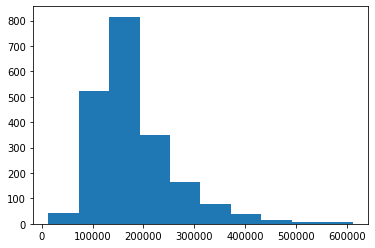

In [9]:
# Checking visual of the y data. It is highly skewed - let's log transform it to make it more normal
fig , ax = plt.subplots()
ax.hist(y);

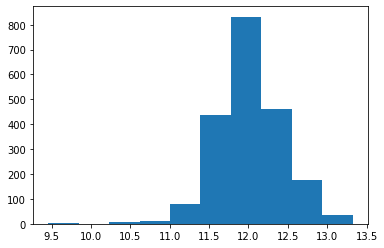

In [10]:
# Better. Less Skewed. More uniform.
y_transformed = np.log1p(y)
fig , ax = plt.subplots()
ax.hist(y_transformed);

In [11]:
train['saleprice_log'] = train['saleprice'].map(np.log) # logging a version of saleprice for y
y_log = train['saleprice_log'] # logged version of y data

In [12]:
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, random_state = 78741)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_log_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_log_test.shape}')

X_train shape: (1532, 32)
y_train shape: (1532,)
X_test shape: (511, 32)
y_test shape: (511,)


#### Creating and Testing Linear Regression, Ridge and Lasso Models

In [13]:
sc = StandardScaler() # Instantiate the standard scaler

# Fit AND transform Standard Scaler to train data in one step, only transform the test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

lr_model = LinearRegression()
lr_model_scaled = lr_model.fit(X_train_sc, y_log_train)
print(f'Linear Model Scaled r2 Train Score: {lr_model_scaled.score(X_train_sc, y_log_train)}')
print(f'Linear Model Scaled r2 Test Score: {lr_model_scaled.score(X_test_sc, y_log_test)}')


ridge_model = Ridge(alpha=10) # Instantiating Ridge with Alpha of 10
# Fitting X scale train data and y logged train data
ridge_model.fit(X_train_sc, y_log_train)
# Evaluate model using R2.
print(f'Ridge Model Train r2 Score: {ridge_model.score(X_train_sc, y_log_train)}')
print(f'Ridge Model Test r2 Score: {ridge_model.score(X_test_sc, y_log_test)}')


# Maybe Ridge CV will be better
ridge_alphas = np.logspace(0, 5, 100) # Setting amount of alphas to test
ridge_cv_model = RidgeCV(
    alphas = ridge_alphas,
    scoring="r2",
    cv=5
)
# Fit model using best ridge alpha!
ridge_cv_model.fit(X_train_sc, y_log_train)

print(f'Ridge CV Model Train score: {ridge_cv_model.score(X_train_sc, y_log_train)}')
print(f'Ridge CV Model Test score: {ridge_cv_model.score(X_test_sc, y_log_test)}')
print(f'Ridge CV Model Optimal Value of Alpha: {ridge_cv_model.alpha_}')

# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of Lasso alphas.
lasso_model = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)
lasso_model.fit(X_train_sc, y_log_train)
print(f'Lasso Model Optimal Value of Alpha: {lasso_model.alpha_}')
print(f'Lasso Model Train score: {lasso_model.score(X_train_sc, y_log_train)}')
print(f'Lasso Model Test score: {lasso_model.score(X_test_sc, y_log_test)}')

Linear Model Scaled r2 Train Score: 0.8897989152668943
Linear Model Scaled r2 Test Score: 0.8824389709826879
Ridge Model Train r2 Score: 0.8897727058759879
Ridge Model Test r2 Score: 0.8823774475828365
Ridge CV Model Train score: 0.8895928955864726
Ridge CV Model Test score: 0.8821136195938637
Ridge CV Model Optimal Value of Alpha: 32.74549162877728
Lasso Model Optimal Value of Alpha: 0.0013219411484660286
Lasso Model Train score: 0.889244033428183
Lasso Model Test score: 0.8815617585999664


#### **Storing Predictions from Various Models Created**

In [14]:
lr_scaled_predictions = lr_model_scaled.predict(X_test_sc)
lr_scaled_predictions_clean = np.expm1(lr_scaled_predictions)

ridge_predictions = ridge_model.predict(X_test_sc)
ridge_predictions_clean = np.expm1(ridge_predictions)

ridge_cv_predictions = ridge_cv_model.predict(X_test_sc)
ridge_cv_predictions_clean = np.expm1(ridge_cv_predictions)

lasso_predictions = lasso_model.predict(X_test_sc)
lasso_predictions_clean = np.expm1(lasso_predictions)

In [15]:
print('Model CV Scores: ')
print(f'My Linear Model Score: {cross_val_score(lr_model, X_train, y_log_train, cv = 5).mean()}')
print(f'My Ridge_CV Score: {cross_val_score(ridge_cv_model, X_train_sc, y_log_train, cv = 5).mean()}')
print(f'My Lasso Score: {cross_val_score(lasso_model, X_train_sc, y_log_train, cv = 5).mean()}')

Model CV Scores: 
My Linear Model Score: 0.8850611746155357
My Ridge_CV Score: 0.8853561040868145
My Lasso Score: 0.885541138752016


### Examining Ridge and then Lasso Coefficients

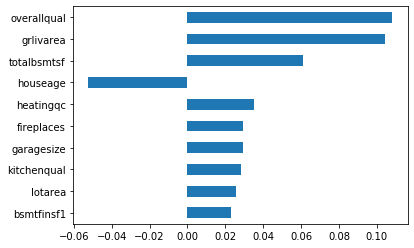

In [16]:
# Top 10 Lasso Coefficients
lasso_model.coef_dataframe = pd.DataFrame(lasso_model.coef_, index=X.columns)
lasso_model.coef_dataframe['abs'] = lasso_model.coef_dataframe[0].abs()
lasso_model.coef_dataframe.sort_values('abs')[0].tail(10).plot.barh();

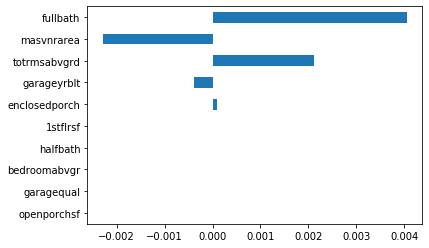

In [17]:
# Bottom 10 Lasso Coefficients
lasso_model.coef_dataframe = pd.DataFrame(lasso_model.coef_, index=X.columns)
lasso_model.coef_dataframe['abs'] = lasso_model.coef_dataframe[0].abs()
lasso_model.coef_dataframe.sort_values('abs')[0].head(10).plot.barh(); # we can probably have a better model by dropping some of these features

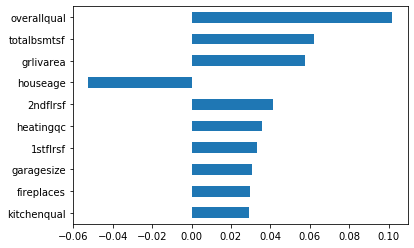

In [18]:
# Top 10 Ridge Coefficients
ridge_cv_model.coef_dataframe = pd.DataFrame(ridge_cv_model.coef_, index=X.columns) 
ridge_cv_model.coef_dataframe['abs'] = ridge_cv_model.coef_dataframe[0].abs()
ridge_cv_model.coef_dataframe.sort_values('abs')[0].tail(10).plot.barh();

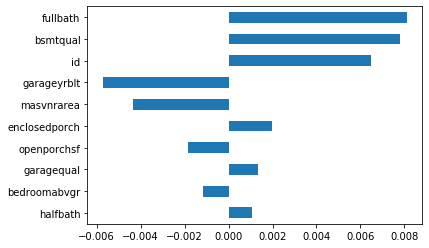

In [19]:
# Bottom 10 Ridge Coefficients
ridge_cv_model.coef_dataframe = pd.DataFrame(ridge_cv_model.coef_, index=X.columns) 
ridge_cv_model.coef_dataframe['abs'] = ridge_cv_model.coef_dataframe[0].abs()
ridge_cv_model.coef_dataframe.sort_values('abs')[0].head(10).plot.barh();

In [20]:
X_sm = sm.add_constant(X)

/Users/dylanlunde/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
model = sm.OLS(y, X_sm).fit()

In [22]:
model.summary() # Checking out Statsmodel summary. Many features with p-values over .05 that we can experiment with dropping in the future

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     507.0
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:26:51   Log-Likelihood:                -23692.
No. Observations:                2043   AIC:                         4.745e+04
Df Residuals:                    2010   BIC:                         4.764e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.485e+05    8.4e+04     -1.769      0.077   -3.13e+05    1.61e+04
id                0.6515      0.702      0.928      0.353      -0.725       2.028
lotfrontage     118.1437     34.772      3.398      0.001      49.951     186.337
lotarea           1.1482      0.147      7.817      0.000       0.860       1.436
overallqual    1.082e+04    800.209     13.519      0.000    9248.949    1.24e+04
masvnrarea       28.4647      4.055      7.020      0.000      20.512      36.417
exterqual      1.402e+04   1818.967      7.708      0.000    1.05e+04    1.76e+04
bsmtqual       1.008e+04   1461.174      6.901      0.000    7218.048    1.29e+04
bsmtcond       1566.2898   2030.273      0.771      0.441   -2415.369    5547.948
bsmtfinsf1       15.5470      3.837      4.051      0.000       8.021      23.073
bsmtunfsf        -5.6491      3.860     -1.463      0.144     -13.220       1.922
totalbsmtsf      25.7968      4.433      5.819      0.000      17.103      34.491
heatingqc      2450.2966    767.408      3.193      0.001     945.298    3955.295
1stflrsf         35.4941     12.338      2.877      0.004      11.297      59.691
2ndflrsf         34.4212     12.085      2.848      0.004      10.720      58.122
grlivarea        11.8648     12.088      0.982      0.326     -11.842      35.571
bsmtfullbath    546.2540   1585.146      0.345      0.730   -2562.448    3654.956
fullbath      -2548.6290   1748.348     -1.458      0.145   -5977.393     880.135
halfbath       -898.2227   1736.502     -0.517      0.605   -4303.755    2507.309
bedroomabvgr  -5224.7513   1099.391     -4.752      0.000   -7380.817   -3068.686
kitchenabvgr  -1.726e+04   3371.056     -5.120      0.000   -2.39e+04   -1.06e+04
kitchenqual    1.063e+04   1421.608      7.476      0.000    7839.632    1.34e+04
totrmsabvgrd   2988.1899    797.485      3.747      0.000    1424.205    4552.174
fireplaces     3001.7663   1156.246      2.596      0.009     734.201    5269.332
garageyrblt      -3.3051     43.304     -0.076      0.939     -88.231      81.621
garagequal     4847.9961   3034.666      1.598      0.110   -1103.423    1.08e+04
garagecond      401.5510   3215.589      0.125      0.901   -5904.685    6707.787
wooddecksf       11.6448      5.098      2.284      0.022       1.646      21.643
openporchsf      -0.1590      9.797     -0.016      0.987     -19.373      19.055
enclosedporch     1.5609     10.843      0.144      0.886     -19.703      22.825
screenporch      54.3047     10.758      5.048      0.000      33.206      75.403
garagesize       10.8673      1.239      8.768      0.000       8.436      13.298
houseage        -47.2815     41.856     -1.130      0.259    -129.368      34.805
==============================================================================
Omnibus:                      457.028   Durbin-Watso

# **Preparing Submissions**

#### Final Ridge CV Model and Predictions for Submission

In [23]:
X = train[features_numeric] # Starting fresh by making X equal the entire training set and my desired features

In [24]:
X_sc = sc.fit_transform(X) # Scaling the training data

In [25]:
ridge_cv_model.fit(X_sc, y_log) # Fitting final model to entire set of data, not just train_test_split section. Scaled X data and logged y data

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [26]:
X_test = test[features_numeric] # Setting an X variable for the test data to match my training data

In [27]:
X_test.shape # Making sure the shape is my desired output of 1,459 rows and 32 columns/features

(1459, 32)

In [28]:
X_test_sc = sc.fit_transform(X_test) # Scaling the test data

In [29]:
predictions_to_submit = ridge_cv_model.predict(X_test_sc) # Creating initial predictions for submission on scaled Test data
predictions_to_submit = np.expm1(predictions_to_submit) # Reassigning variable to de-logged data

In [30]:
len(predictions_to_submit) # Re-checking the length of predictions to submit. It matches the desired amount of 1459

1459

### Preparing desired DataFrame and Structure for Kaggle Submission

In [31]:
test['SalePrice'] = predictions_to_submit # Adding SalePrice column to test DataFrame as per Kaggle's requirements
test[['id', 'SalePrice']] # Checking to see if this code produces the desired DataFrame for Kaggle

,id,SalePrice
0,1461,121336.521237
1,1462,160673.466638
2,1463,168485.974181
3,1464,191470.973646
4,1465,197210.539093
...,...,...
1454,2915,97614.009285
1455,2916,98682.529360
1456,2917,188387.563350
1457,2918,121952.762643


In [32]:
submission = test[['id', 'SalePrice']] # Saving desired DataFrame to 'submission' variable as required by Kaggle
submission.to_csv('./submission_03_26_final.csv', index=False) # Saving DataFrame to csv on my local machine, index=False

In [33]:
submission # Checking final submission

,id,SalePrice
0,1461,121336.521237
1,1462,160673.466638
2,1463,168485.974181
3,1464,191470.973646
4,1465,197210.539093
...,...,...
1454,2915,97614.009285
1455,2916,98682.529360
1456,2917,188387.563350
1457,2918,121952.762643
